In [1]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_excel("F:\Programming\Python\DAaML\lesson2\sem_1\Вариант 2.xlsx", header=2)

In [8]:
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0


In [11]:
np_data = data.to_numpy()[:-1]

In [12]:
np_data

array([[1.0, 124.0, 11, ..., 1.0, 5.0, 27.0],
       [2.0, 128.0, 11, ..., 1.0, 5.0, 27.0],
       [3.0, 132.0, 11, ..., 1.0, 5.0, 27.0],
       ...,
       [2354.0, 136.0, 11, ..., 27.0, 96.0, 27.0],
       [2355.0, 136.0, 11, ..., 27.0, 96.0, 27.0],
       [2356.0, 136.0, 11, ..., 27.0, 96.0, 27.0]], dtype=object)

In [13]:
print("Кол-во измерений: ", np_data.ndim)

Кол-во измерений:  2


In [16]:
print("Размер измерений: ", np_data.shape)

Размер измерений:  (2356, 11)


In [15]:
print("Кол-во ячеек: ", np_data.size)

Кол-во ячеек:  25916


In [17]:
mean_points = np.mean(np_data[:, 9])

In [18]:
mean_points

49.25509337860781

In [19]:
median_points = np.median(np_data[:, 9])

In [20]:
median_points

50.0

In [22]:
minimum = np.min(np_data[:, 9])

In [23]:
minimum

5.0

In [24]:
maximum = np.max(np_data[:, 9])

In [25]:
maximum

96.0

In [26]:
a = np_data[np_data[:, 9] >= 27]

In [37]:
a.shape[0] / np_data.shape[0]*100

90.78947368421053

In [36]:
import matplotlib.pyplot as plt

ValueError: Wedge sizes 'x' must be non negative values

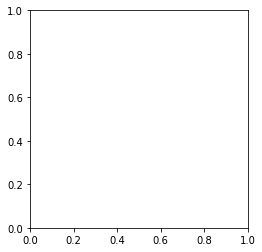

In [56]:
x = a.shape[0]/np_data.shape[0]*100
sizes = [x, 1-x]
fig1, ax1 = plt.subplots()
ax1.pie(sizes)
ax1.axis('equal')
plt.show()

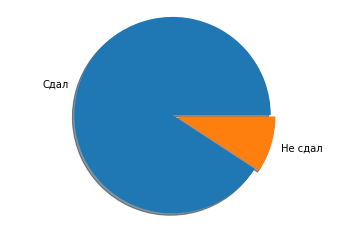

In [53]:
labels = "Сдал", "Не сдал"
explode = (0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True)
ax1.axis('equal')
plt.show()

In [46]:
x = a.shape[0] / np_data.shape[0]
x

0.9078947368421053

In [49]:
from sklearn.neighbors import KernelDensity
import scipy

(array([ 55., 162., 154., 496., 520., 193., 326., 366.,  71.,  13.]),
 array([5.0, 14.1, 23.2, 32.3, 41.4, 50.5, 59.599999999999994,
        68.69999999999999, 77.8, 86.89999999999999, 96.0], dtype=object),
 <BarContainer object of 10 artists>)

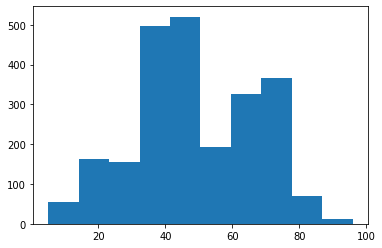

In [50]:
plt.hist(np_data[:, 9])

In [68]:
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(np_data[:, 9].reshape(-1, 1))
z = np.linspace(0, 100, 15)[:, np.newaxis]
a = kde.score_samples(x)
plt.fill(x, np.exp(a))

ValueError: Expected 2D array, got scalar array instead:
array=90.78947368421053.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [70]:
print("Процент неудов:", np_data[np_data[:, 9] < 27].shape[0] / np_data.shape[0] * 100)
print("Процент удв:", np_data[(np_data[:, 9] >= 27) & (np_data[:, 9] < 75)].shape[0] / np_data.shape[0] * 100)
print("Процент отл:", np_data[(np_data[:, 9] >= 75)].shape[0] / np_data.shape[0] * 100)
a = np_data[np_data[:, 9] < 27].shape[0]
b = np_data[(np_data[:, 9] >= 27) & (np_data[:, 9] < 50)].shape[0]
c = np_data[(np_data[:, 9] >= 50) & (np_data[:, 9] < 75)].shape[0]
d = np_data[(np_data[:, 9] >= 75)].shape[0]
total = np_data.shape[0]

Процент неудов: 9.210526315789473
Процент удв: 85.05942275042445
Процент отл: 5.730050933786078


In [71]:
print("Процент неудов:", a/total * 100)
print("Процент удв:", b/total * 100)
print("Процент хорошо:", c/total * 100)
print("Процент отл:", d/total * 100)

Процент неудов: 9.210526315789473
Процент удв: 38.79456706281834
Процент хорошо: 46.26485568760611
Процент отл: 5.730050933786078


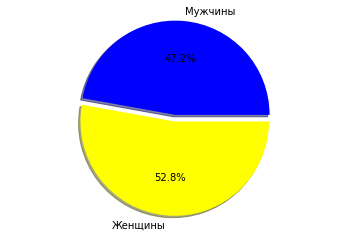

In [87]:
total = np_data[:, 3].shape[0]
males = np_data[np_data[:, 3] == "М"].shape[0] / total * 100
females = np_data[np_data[:, 3] == "Ж"].shape[0] / total * 100
sizes = [males, females]
labels = "Мужчины", "Женщины"
explode = (0, 0.07)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%.1f%%', explode=explode, labels=labels, shadow=True, colors=['blue', 'yellow'])
ax1.axis('equal')
plt.show()

In [74]:
np.unique(np_data[:, 1])

array([121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0,
       130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0],
      dtype=object)

In [ ]:
Ср бал юношей и девушек
Ср кол-во выполненых заданий
добавить это все снизу данных
Добавить объяснения функций